In [3]:
import pandas as pd
from pandas_datareader import data
import datetime as dt
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mp

In [4]:
# get stock name of S&P 500
stock_data = json.load(open('constituents.json','r'))
name_list = []
for i in stock_data:
    name_list.append(i['Symbol'])

# get stock price from yahoo from 2011 to today
start_date = dt.datetime(2011,1,1)
end_date = dt.datetime.today()
data_frame_name = data.DataReader(name_list,'yahoo',start_date,end_date)
stock_adj_close = data_frame_name['Adj Close']

//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'DTV', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'FDO', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'HSP', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'HCBK', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'KRFT', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
//anaconda/lib/python3.4/site-packages/pandas_datareader/_utils.py:53: SymbolWarning: Failed to read symbol: 'SIAL', replacing with N

In [5]:
# find top ten return stock from start_date to end_date

def week_portfolio (start_date, end_date):
    
    # calculte the return during start_date and end_date 
    stock_adj_close_array = np.array(stock_adj_close.loc[start_date:end_date])
    return_list = (stock_adj_close_array[-1] - stock_adj_close_array[0]) / stock_adj_close_array[0]    
    for i in range(len(return_list)):
        if np.isnan(return_list[i]) == True:   # replace nan of -100 so that stocks with nan value will not be selected
            return_list[i] = -100
    
    # record names and returns of stocks in name_return_list
    name_return_list = []
    for i in range(len(return_list)):
            name_return = []
            name_return.append(name_list[i])
            name_return.append(return_list[i])
            name_return_list.append(name_return)
    
    # get top 10 return stocks
    top_ten_return_stocks = []
    i = 0
    while i < 10:
        j = 0
        while j < len(name_return_list)-i-1:
            if name_return_list[j][1] > name_return_list[j+1][1]:
                temp = name_return_list[j]
                name_return_list[j] = name_return_list[j+1]
                name_return_list[j+1] = temp
            j = j+1
        top_ten_return_stocks.append(name_return_list[j])
        i = i+1
    
    return top_ten_return_stocks

In [6]:
# find performance of the stocks in portfolio from start_date to end_date

def next_week_performance (portfolio, start_date, end_date):
        
    # calculte the return during start_date and end_date 
    stock_adj_close_array = np.array(stock_adj_close.loc[start_date:end_date])
    return_list = (stock_adj_close_array[-1] - stock_adj_close_array[0]) / stock_adj_close_array[0]    
    for i in range(len(return_list)):
        if np.isnan(return_list[i]) == True:    # replace nan of -100 so that stocks with nan value will not be selected
            return_list[i] = -100

    # record names and returns of stocks in name_return_list
    name_return_list = []
    for i in range(len(return_list)):
            name_return = []
            name_return.append(name_list[i])
            name_return.append(return_list[i])
            name_return_list.append(name_return)                  
            
    # find portfolio's stocks in name_return_list and get their returns
    performance = []
    for i in portfolio:
        for j in range(len(name_return_list)):
            if i[0] == name_return_list[j][0]:
                performance.append(name_return_list[j])
    
    
    return performance
    

In [7]:
# get start_date and end_date of every week from 2011 to today

start_date = []
end_date = []

from datetime import date, timedelta

temp_date = dt.datetime(2011,1,3)  # 2011.1.3 is the first monday in 2011
stop_date = dt.datetime.today()

while temp_date + timedelta(6) <= stop_date:
    start_date.append(temp_date)
    temp_date = temp_date + timedelta(6)
    end_date.append(temp_date)
    temp_date = temp_date + timedelta(1)

for i in range(len(start_date)):
    print(start_date[i],end_date[i])

2011-01-03 00:00:00 2011-01-09 00:00:00
2011-01-10 00:00:00 2011-01-16 00:00:00
2011-01-17 00:00:00 2011-01-23 00:00:00
2011-01-24 00:00:00 2011-01-30 00:00:00
2011-01-31 00:00:00 2011-02-06 00:00:00
2011-02-07 00:00:00 2011-02-13 00:00:00
2011-02-14 00:00:00 2011-02-20 00:00:00
2011-02-21 00:00:00 2011-02-27 00:00:00
2011-02-28 00:00:00 2011-03-06 00:00:00
2011-03-07 00:00:00 2011-03-13 00:00:00
2011-03-14 00:00:00 2011-03-20 00:00:00
2011-03-21 00:00:00 2011-03-27 00:00:00
2011-03-28 00:00:00 2011-04-03 00:00:00
2011-04-04 00:00:00 2011-04-10 00:00:00
2011-04-11 00:00:00 2011-04-17 00:00:00
2011-04-18 00:00:00 2011-04-24 00:00:00
2011-04-25 00:00:00 2011-05-01 00:00:00
2011-05-02 00:00:00 2011-05-08 00:00:00
2011-05-09 00:00:00 2011-05-15 00:00:00
2011-05-16 00:00:00 2011-05-22 00:00:00
2011-05-23 00:00:00 2011-05-29 00:00:00
2011-05-30 00:00:00 2011-06-05 00:00:00
2011-06-06 00:00:00 2011-06-12 00:00:00
2011-06-13 00:00:00 2011-06-19 00:00:00
2011-06-20 00:00:00 2011-06-26 00:00:00


In [8]:
# choose top 10 return stocks every week from 2011 to 2015 and calculate their return in next week.

portfolio_average_week_return = []
i = 0
while i < len(start_date)-1:
    
    portfolio = week_portfolio(start_date[i],end_date[i])
    print(start_date[i],'to',end_date[i],'top ten return stocks:',portfolio)
    performance = next_week_performance(portfolio, start_date[i+1], end_date[i+1])
    print('next week performance:', performance)
    
    next_week_return = []
    for j in performance:
        next_week_return.append(j[1])
        
    average_next_week_return = np.mean(next_week_return)
    print(average_next_week_return)
    print('')
    
    portfolio_average_week_return.append(average_next_week_return)
    
    i = i+1

2011-01-03 00:00:00 to 2011-01-09 00:00:00 top ten return stocks: [['NUE', 0.2560051609413877], ['PNC', 0.10668365549243286], ['LEN', 0.10431969629651833], ['UTX', 0.10406641433902857], ['WFM', 0.089366053131561096], ['MAT', 0.089252595964661285], ['R', 0.081579475504279436], ['RAI', 0.080645129301884763], ['DAL', 0.074288290016895048], ['ABBV', 0.070422566044861856]]
next week performance: [['NUE', 0.14348040615322064], ['PNC', 0.059756028430535506], ['LEN', 0.0043685682300565951], ['UTX', 0.052025416997617105], ['WFM', 0.0010109692655916414], ['MAT', 0.0073094764343172459], ['R', 0.012489903420370176], ['RAI', 0.070886465812944902], ['DAL', 0.080340383872383903], ['ABBV', -0.059285098169528962]]
0.0372382520448

2011-01-10 00:00:00 to 2011-01-16 00:00:00 top ten return stocks: [['MTB', 0.14414414414414428], ['NUE', 0.14348040615322064], ['MYL', 0.13567251461988306], ['AIG', 0.11256347367812634], ['IRM', 0.11203136198711075], ['MDLZ', 0.097777190966035959], ['AEP', 0.0940195100704459]

In [16]:
# calculate total return of the strategy

relative_value = 1
relative_value_list = []
for i in portfolio_average_week_return:
    relative_value = relative_value * (1+i)
    relative_value_list.append(relative_value)
print('total return from 2011.1.3 to today is:',str((relative_value-1)*100)+'%')


total return from 2011.1.3 to today is: 103.786910912%


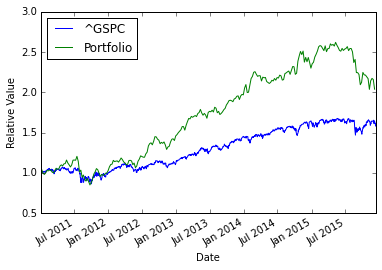

In [22]:
# compare the total return of the srategy with S&P 500 index in same period

return_date = []
for i in range(len(end_date)-1):
    return_date.append(end_date[i])

start=dt.datetime(2011, 1, 1)
end=dt.datetime.today()
sp500 = data.DataReader(["^GSPC"],'yahoo',start,end)
sp500_index_relative_value_list = sp500['Adj Close']/1271.869995   # divide the S&P 500 index of 2011.1.3

sp500_index_relative_value_list.plot()
plt.plot(return_date,relative_value_list,label="Portfolio")
plt.legend(loc=2)
plt.ylabel('Relative Value')
plt.show()